In [ ]:
# A simpler version of the actual tensorflow version of image number classification

In [ ]:
#%tensorflow_version 1.x  # this line is not required unless you are in a notebook

In [ ]:
!pip install matplotlib

In [ ]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import math

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 resolution images of handwritten digits 0-9

# Unpacking the data into variables x_train, x_test, y_train and y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt

11493376/11490434 [==============================] - 0s 0us/step


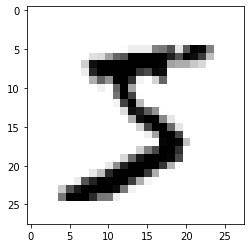

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
# Normalize the data. This means that we have to fit the pixel value data to data between 0 and 1 or -1 and 1
print("This is the original value of the first image's data:\n", x_train[0])

This is the original value of the first image's data:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0

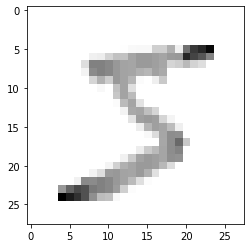

In [ ]:
# Normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Plotting the new values
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
# Convolutional Neural Network
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling the model
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['accuracy'])

In [ ]:
# # Training the model
# BATCH_SIZE = 32
# train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
# test_dataset = test_dataset.cache().batch(BATCH_SIZE)

# conv_model.fit( , epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

In [ ]:
# Defining the model
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Flattening the image. This means that we are converting the shape of [28, 28] to [1, 784] so that the neural network can work more efficiently
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Hidden layer 1 is densely connected. So "Dense". Also, this has 128 neurons or units
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Hidden layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer with 10 neurons. Why 10? Because we have 10 handwritten digits to classify
# Why softmax activation function for the last layer??
# Because the output is going to have a distribution of probabilities of each 
# digit. So, for probability distribution, we have to use softmax activation
# function

# Thats it! Defining the model is done! So much simpler than using the actual 
# tensorflow coding from scratch!!!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the neural network
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2640 - accuracy: 0.9230
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.9672
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9769
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9824
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0413 - accuracy: 0.9863
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9892


In [ ]:
# Did we overfit??
# Let's check it.
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0962 - accuracy: 0.9716
0.09615099430084229 0.9715999960899353


In [ ]:
# Saving the model
model.save('epic_num_classifier.model')

In [ ]:
# Reloading the model
new_model = tf.keras.models.load_model('epic_num_classifier.model')

In [ ]:
# Making predictions
predictions = model.predict([x_test]) # Note that the argument passed into the .predict() function is ALWAYS a list. So put it b/w []

In [ ]:
print(predictions)

[[1.8414874e-10 1.9187997e-10 2.9803007e-07 ... 9.9999440e-01
  9.1014396e-09 7.0402882e-07]
 [1.6233281e-10 1.5015932e-07 9.9999988e-01 ... 1.4522224e-10
  1.4131077e-10 5.8044091e-14]
 [1.3961479e-09 9.9991643e-01 1.1241942e-06 ... 6.0357324e-06
  7.3840456e-05 1.9383208e-07]
 ...
 [9.8563943e-12 1.0798916e-08 2.5597566e-10 ... 9.8435457e-08
  2.4867836e-08 1.2259543e-06]
 [1.2539902e-10 3.8531338e-11 9.1586660e-12 ... 1.0245609e-10
  1.2892675e-04 1.3501736e-13]
 [2.7231035e-09 1.1084289e-09 7.7678641e-10 ... 4.6353806e-13
  8.4537444e-09 1.7664786e-11]]


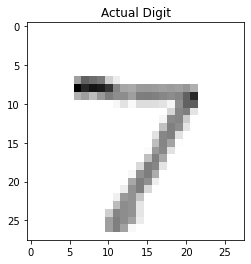

I think thats a:  7


In [ ]:
# Too messy?
# The output in the previous code block was all one hot arrays. Meaning it gave a confidence of what it thought bout each digit
# Basically, they are probability distributions
import numpy as np

#data_number = 16
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.title("Actual Digit")
plt.show()
print("I think thats a: ", np.argmax(predictions[0])) # The prediction of the first data type

In [ ]:
# Code from https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca
# from IPython.display import HTML, Image
# from google.colab.output import eval_js
# from base64 import b64decode

# canvas_html = """
# <canvas width=%d height=%d></canvas>
# <button>Finish</button>
# <script>
# var canvas = document.querySelector('canvas')
# var ctx = canvas.getContext('2d')
# ctx.lineWidth = %d
# var button = document.querySelector('button')
# var mouse = {x: 0, y: 0}
# canvas.addEventListener('mousemove', function(e) {
#   mouse.x = e.pageX - this.offsetLeft
#   mouse.y = e.pageY - this.offsetTop
# })
# canvas.onmousedown = ()=>{
#   ctx.beginPath()
#   ctx.moveTo(mouse.x, mouse.y)
#   canvas.addEventListener('mousemove', onPaint)
# }
# canvas.onmouseup = ()=>{
#   canvas.removeEventListener('mousemove', onPaint)
# }
# var onPaint = ()=>{
#   ctx.lineTo(mouse.x, mouse.y)
#   ctx.stroke()
# }
# var data = new Promise(resolve=>{
#   button.onclick = ()=>{
#     resolve(canvas.toDataURL('image/png'))
#   }
# })
# </script>
# """

# def draw(filename='drawing.png', w=400, h=200, line_width=1):
#   display(HTML(canvas_html % (w, h, line_width)))
#   data = eval_js("data")
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)

In [ ]:
# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow
# import pyscreenshot as ImageGrab

# draw(line_width=10)
# input_image = cv2.imread('drawing.png')
# cv2_imshow(input_image)
# #image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# #print(input_image[0])
# #input_image = input_image.reshape(200, 28, 28, 1)
# # cv2_imshow(image)
# # for i in range(len(image)):
# #   print(image[i])

# im=ImageGrab.grab(bbox=(250, 500, 1000, 1000))

# im.save('img.png')

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.4MB 4.6MB/s 
     |████████████████████████████████| 215kB 30.2MB/s 
     |████████████████████████████████| 962kB 29.5MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 2.7MB 42.6MB/s 


In [ ]:
import gradio as gr
def classify(image):
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}
sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(classify, sketchpad, label, live=True, capture_session=True)

interface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on External URL: https://19559.gradio.app
Interface loading below...


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x7fbdd61cfc18>,
 'http://127.0.0.1:7860/',
 'https://19559.gradio.app')